# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils, sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Age

In [2]:
df = df_clean.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


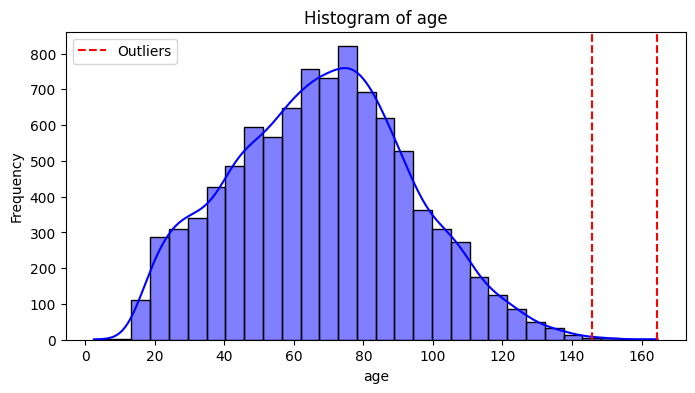

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1434
           1       0.81      0.88      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.579855, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6554\nvalue = [3313, 3241]\nclass = 0')


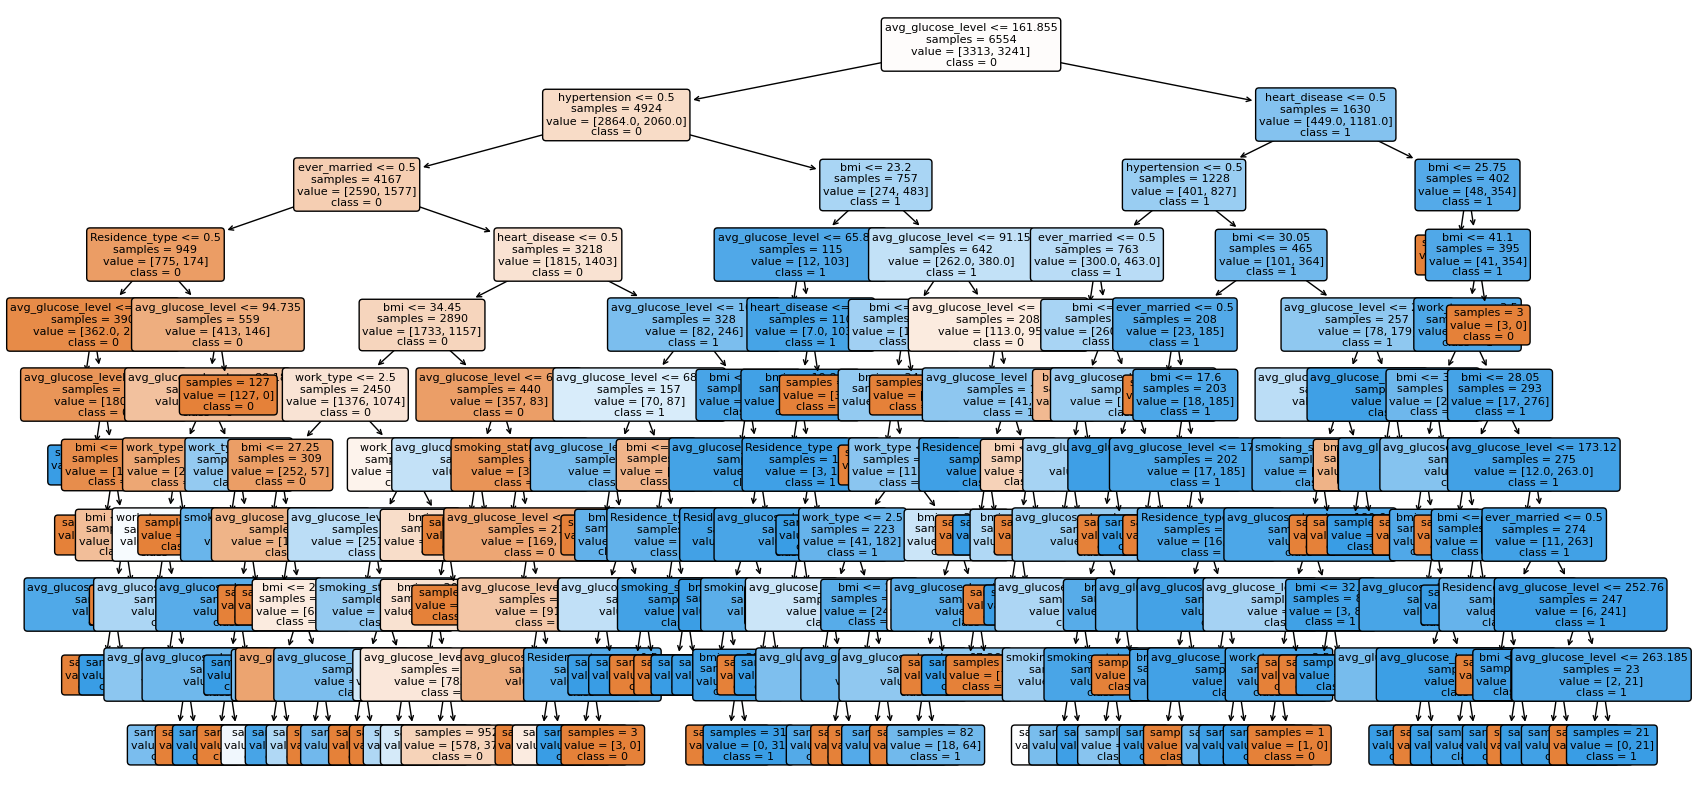

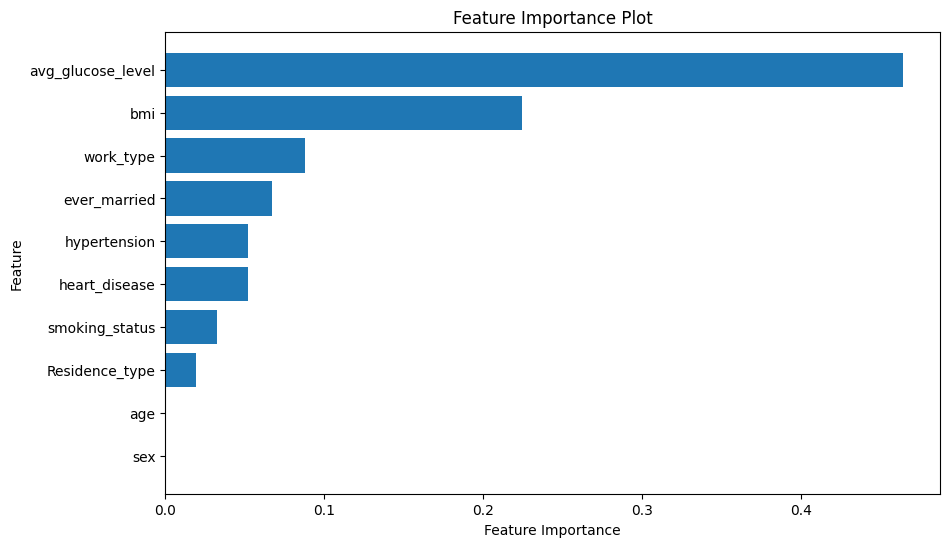

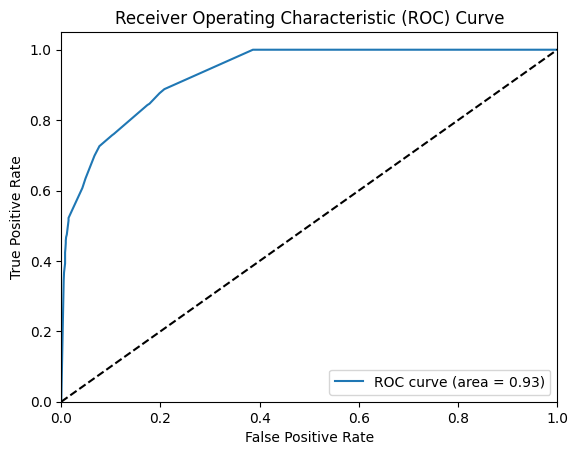

AUC Score: 0.9316612146570307


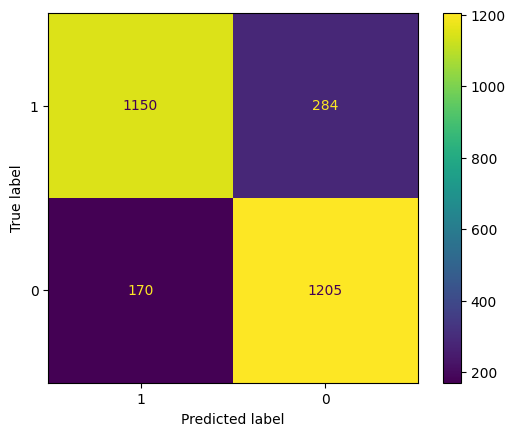

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8220640569395018, 0.8042704626334519, 0.8362989323843416, 0.797153024911032, 0.8185053380782918, 0.7864768683274022, 0.8149466192170819, 0.7900355871886121, 0.8327402135231317, 0.7678571428571429]
Mean accuracy: 0.807034824605999
95% confidence interval: (0.7914184960180826, 0.8226511531939154)


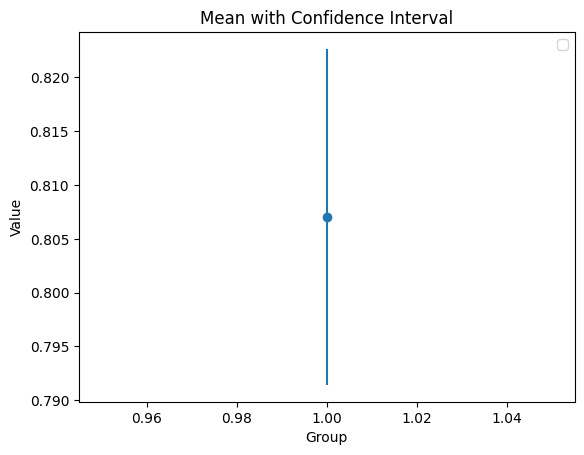

In [6]:
y_pred_prob_age_dt, y_test_age_dt, classification_report_dt_age, decision_tree = ML_algorithms.model_dt(df_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1434
           1       0.85      0.91      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809



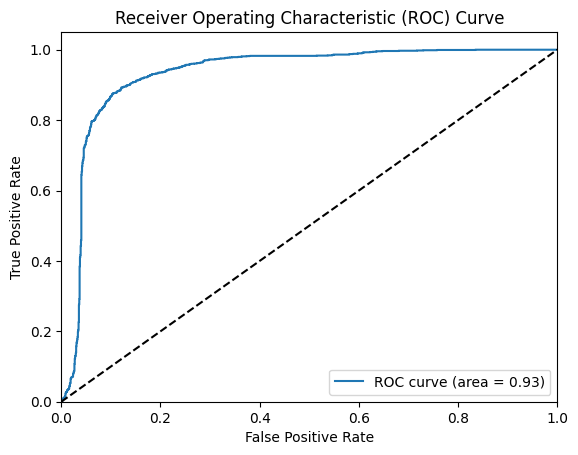

AUC Score: 0.9319188538100672


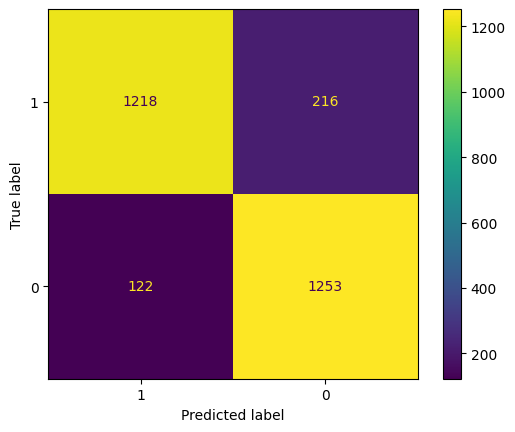

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7580071174377224, 0.8042704626334519, 0.7508896797153025, 0.7793594306049823, 0.800711743772242, 0.7402135231316725, 0.7686832740213523, 0.7259786476868327, 0.7793594306049823, 0.7678571428571429]
Mean accuracy: 0.7675330452465684
95% confidence interval: (0.7497327959088262, 0.7853332945843106)


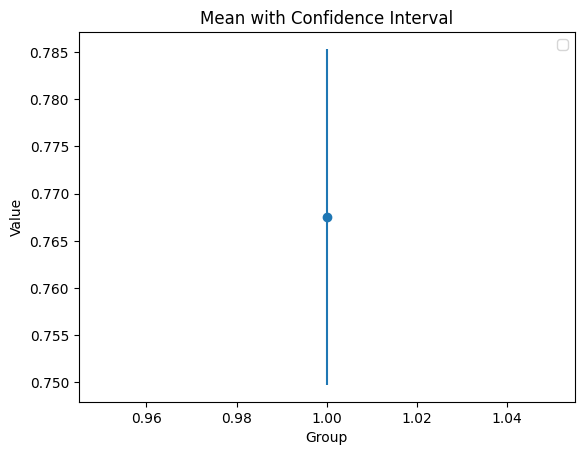

In [7]:
y_pred_prob_age_svm, y_test_age_svm, classification_report_svm_age, svm = ML_algorithms.model_svm(df_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_age, 'age')

Outliers found:


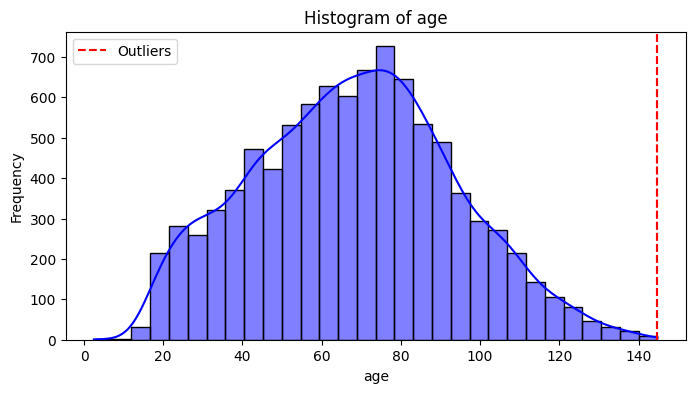

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1434
           1       0.81      0.88      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.579855, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6554\nvalue = [3313, 3241]\nclass = 0')


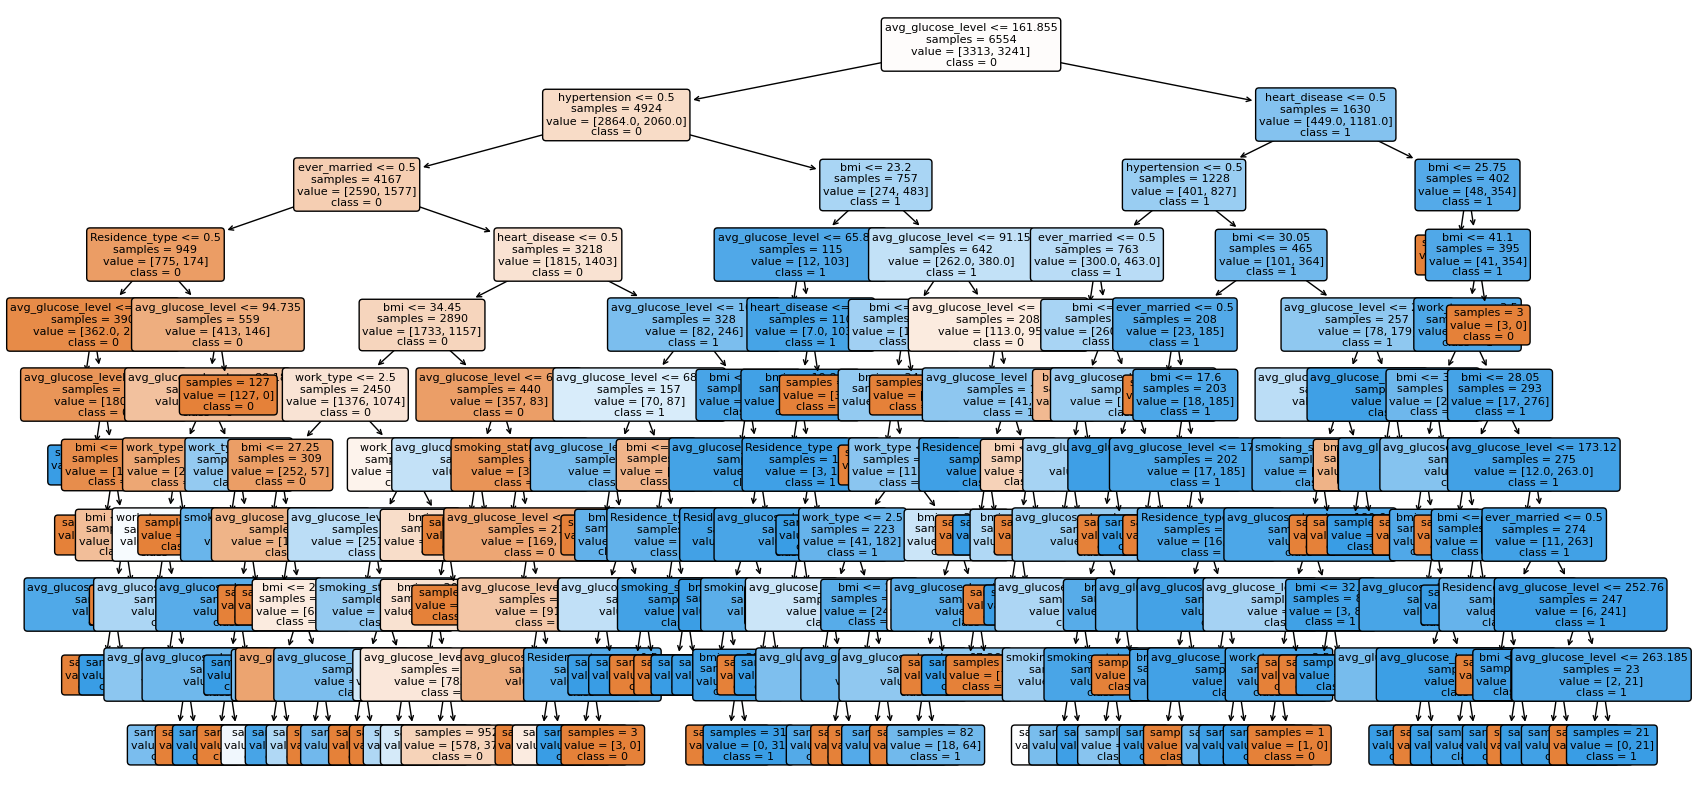

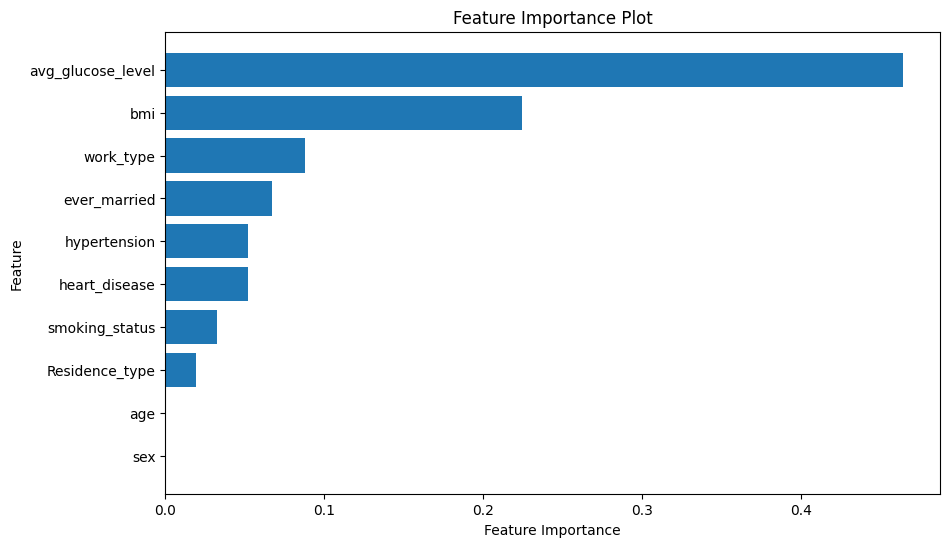

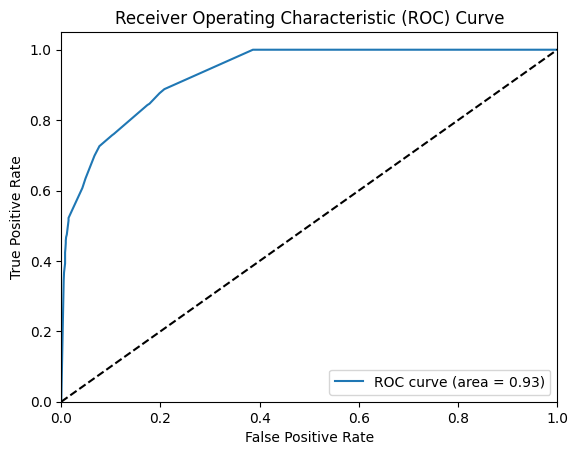

AUC Score: 0.9316612146570307


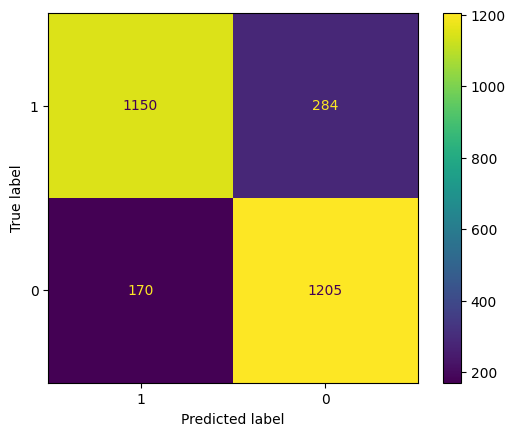

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7935943060498221, 0.8612099644128114, 0.8220640569395018, 0.8185053380782918, 0.8220640569395018, 0.8291814946619217, 0.8291814946619217, 0.7615658362989324, 0.8469750889679716, 0.7857142857142857]
Mean accuracy: 0.8170055922724963
95% confidence interval: (0.7959421021025458, 0.8380690824424467)


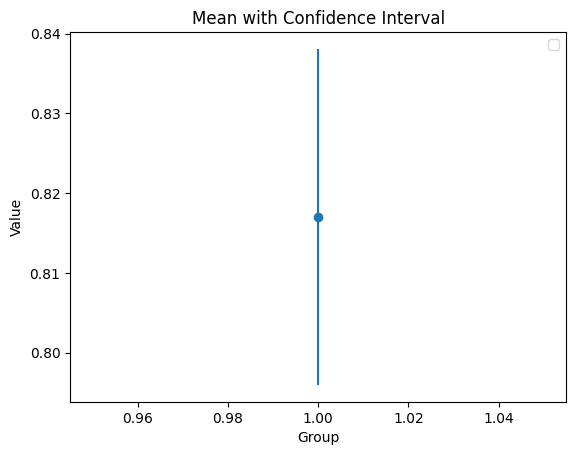

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, classification_report_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1434
           1       0.85      0.91      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809



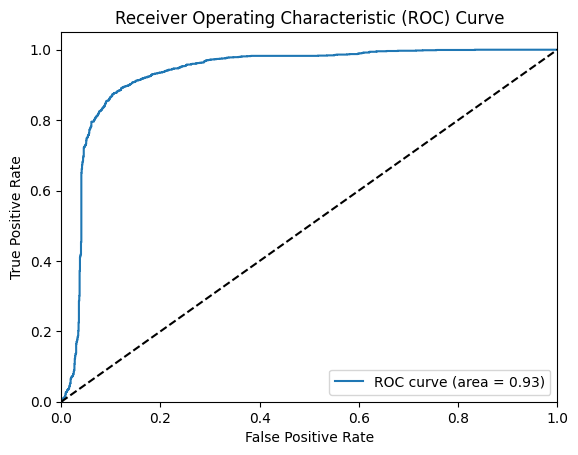

AUC Score: 0.9317634081399773


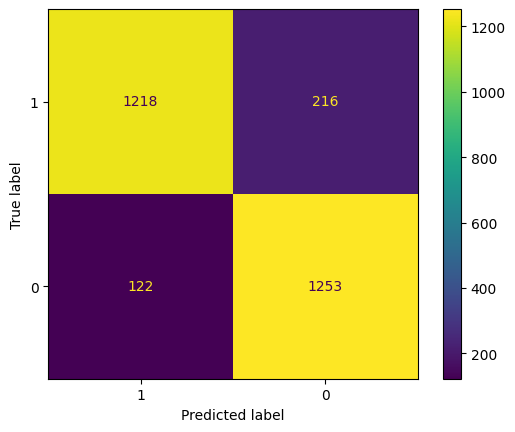

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7935943060498221, 0.7829181494661922, 0.7473309608540926, 0.7793594306049823, 0.797153024911032, 0.7437722419928826, 0.7366548042704626, 0.7651245551601423, 0.7437722419928826, 0.7928571428571428]
Mean accuracy: 0.7682536858159634
95% confidence interval: (0.7512820513628707, 0.7852253202690561)


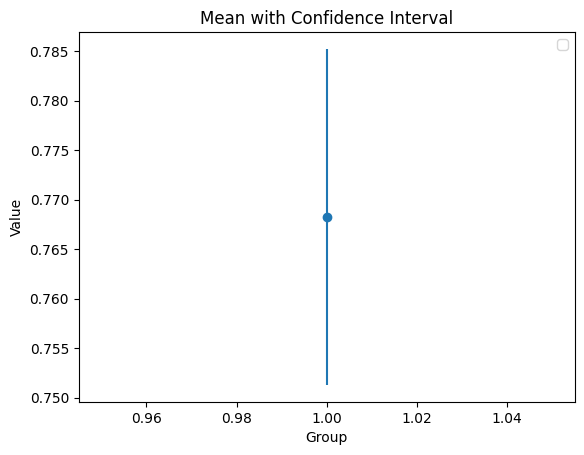

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, classification_report_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_clean.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


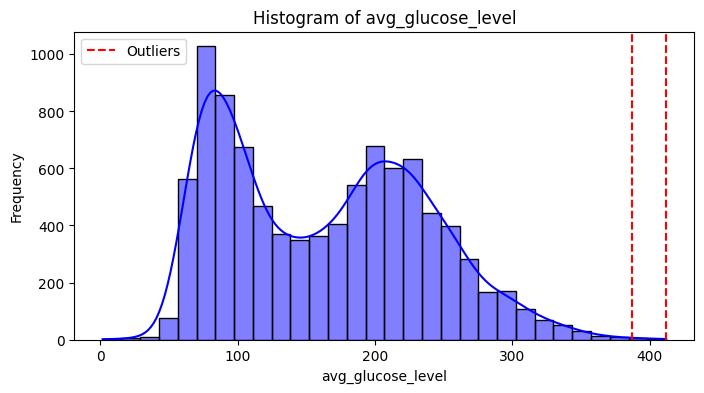

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1434
           1       0.80      0.71      0.75      1375

    accuracy                           0.77      2809
   macro avg       0.78      0.77      0.77      2809
weighted avg       0.78      0.77      0.77      2809

Node Labels:
 Annotation(0.621932, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3341, 3213]\nclass = 0')


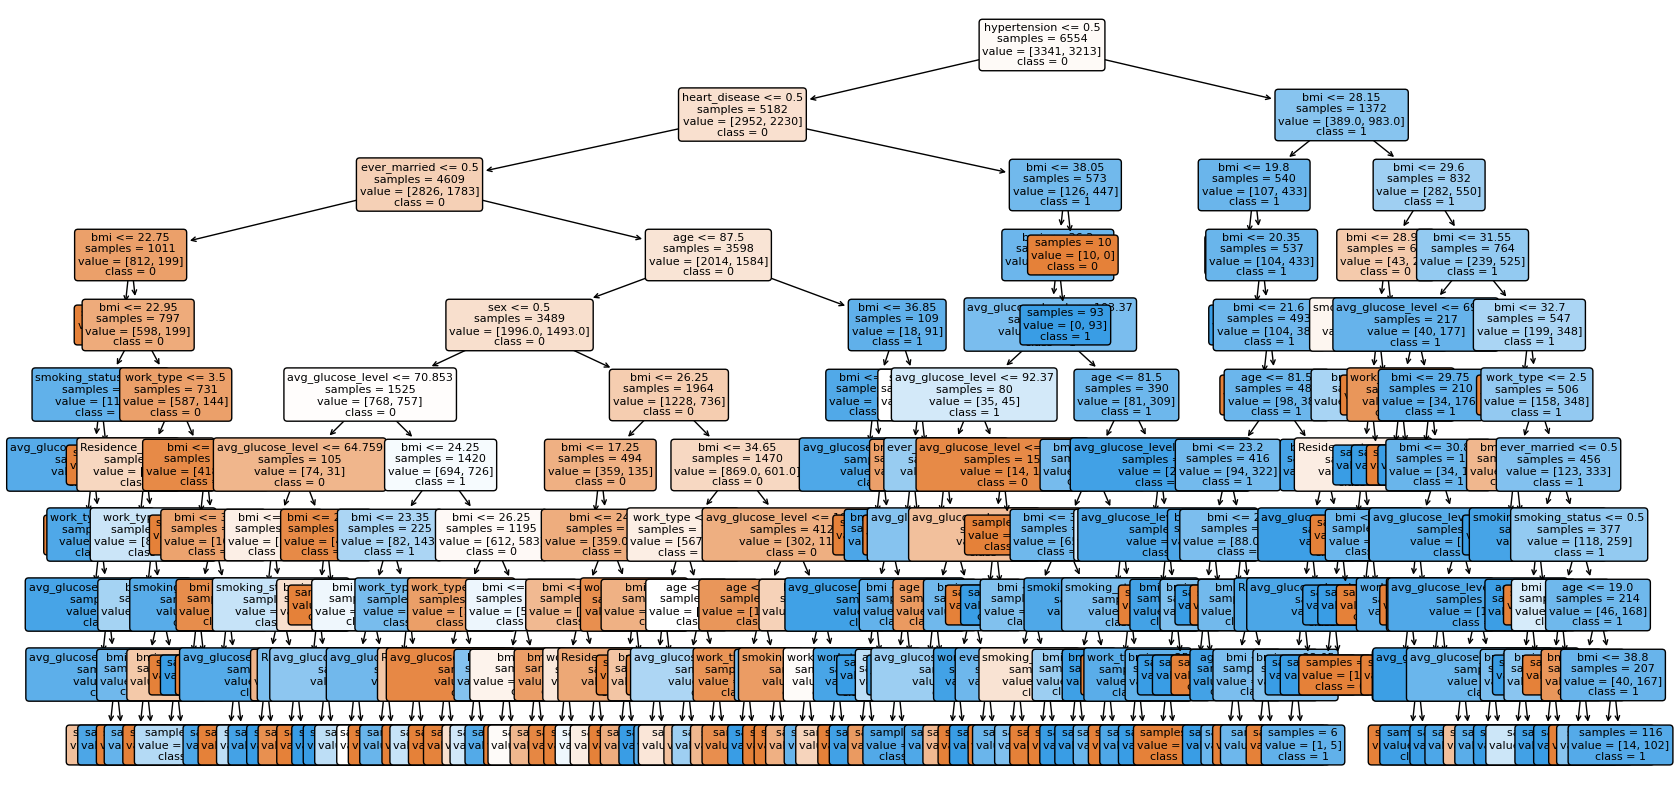

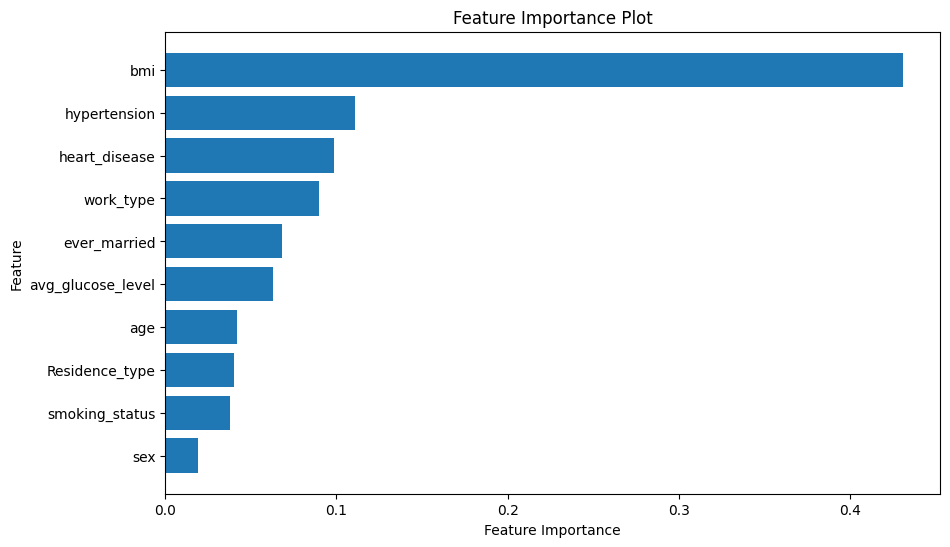

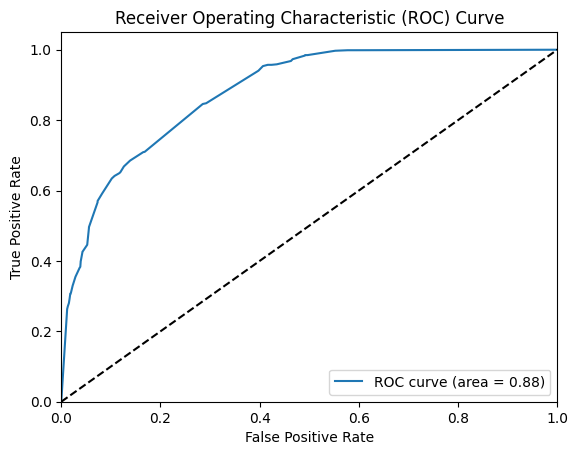

AUC Score: 0.8786101179155572


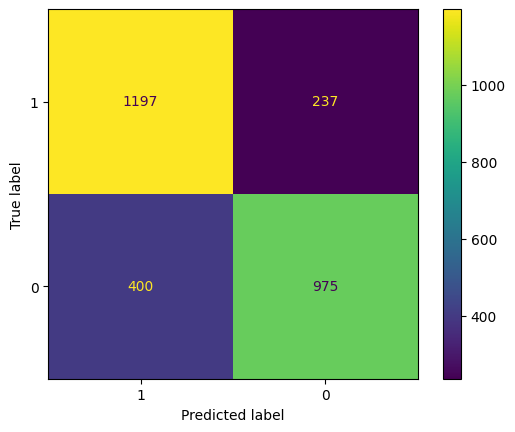

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8185053380782918, 0.8434163701067615, 0.8469750889679716, 0.8576512455516014, 0.8113879003558719, 0.7544483985765125, 0.8362989323843416, 0.8362989323843416, 0.8398576512455516, 0.825]
Mean accuracy: 0.8269839857651246
95% confidence interval: (0.8062923032810327, 0.8476756682492164)


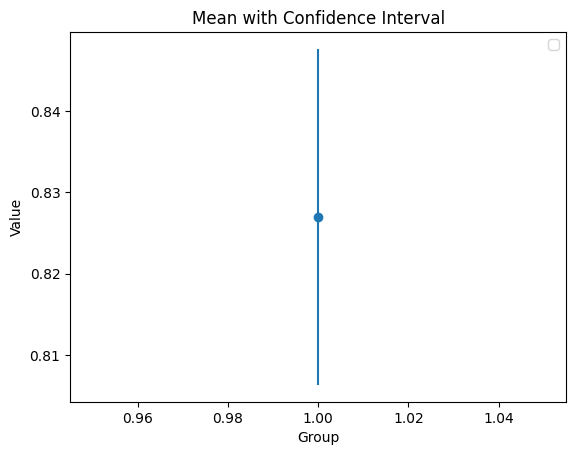

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, classification_report_dt_glucose, decision_tree = ML_algorithms.model_dt(df_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1434
           1       0.79      0.80      0.79      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809



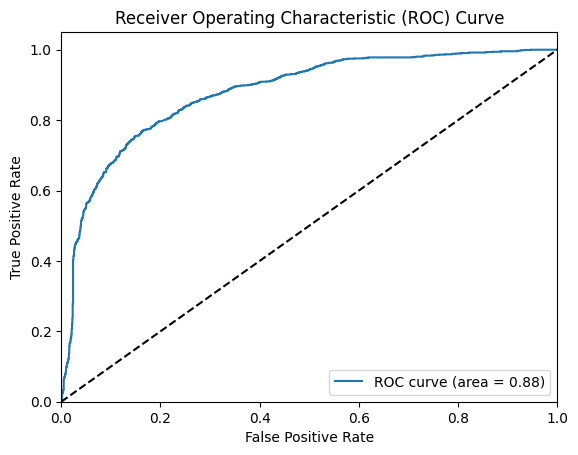

AUC Score: 0.8775615569925194


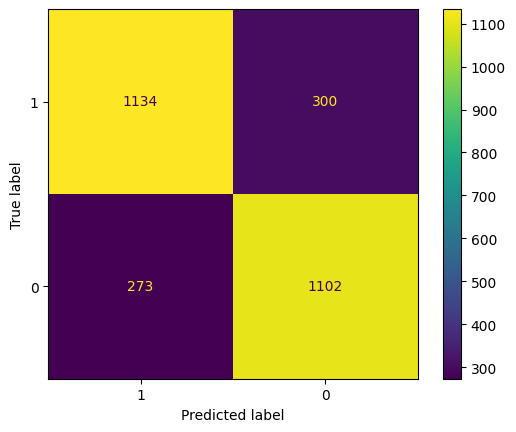

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7473309608540926, 0.7651245551601423, 0.7935943060498221, 0.7864768683274022, 0.7580071174377224, 0.7686832740213523, 0.7473309608540926, 0.7758007117437722, 0.797153024911032, 0.7607142857142857]
Mean accuracy: 0.7700216065073716
95% confidence interval: (0.7572195002664817, 0.7828237127482616)


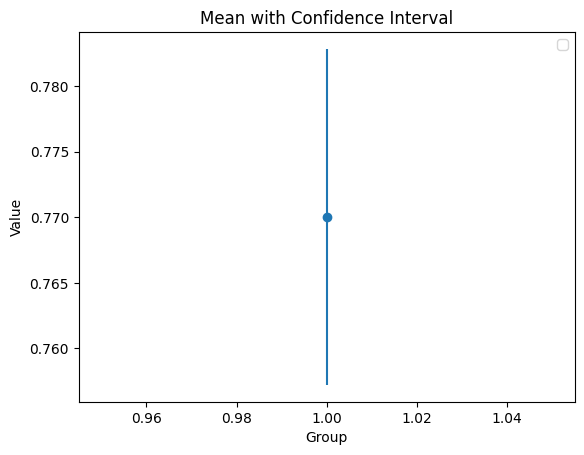

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, classification_report_svm_glucose, svm = ML_algorithms.model_svm(df_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_glucose, 'avg_glucose_level')

Outliers found:


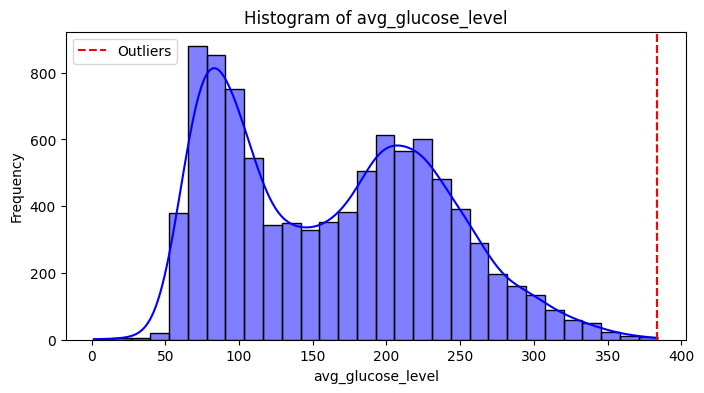

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1434
           1       0.80      0.71      0.75      1375

    accuracy                           0.77      2809
   macro avg       0.78      0.77      0.77      2809
weighted avg       0.78      0.77      0.77      2809

Node Labels:
 Annotation(0.621932, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3341, 3213]\nclass = 0')


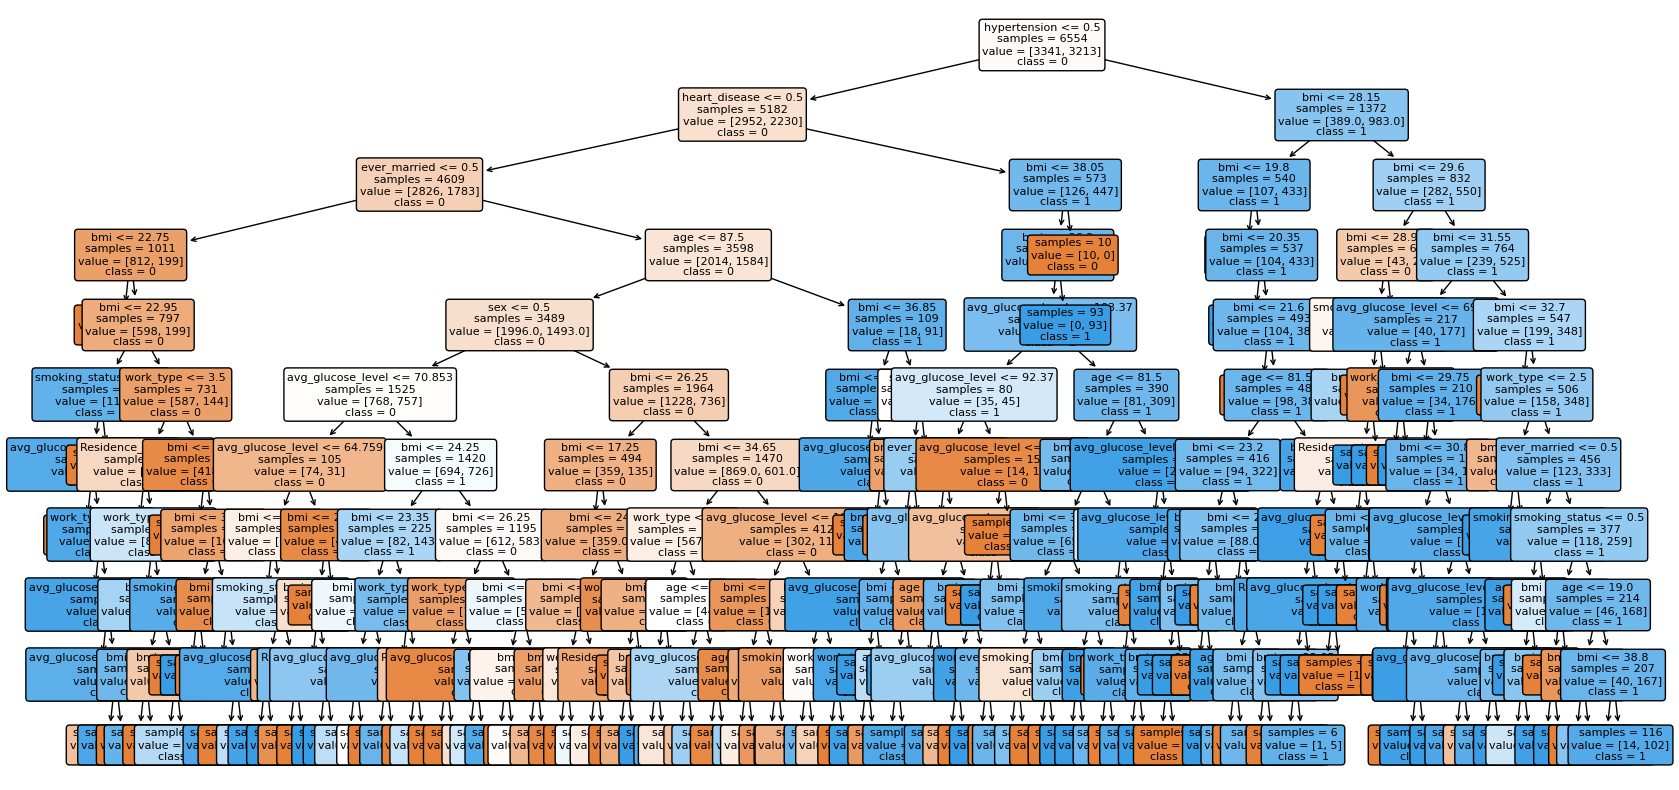

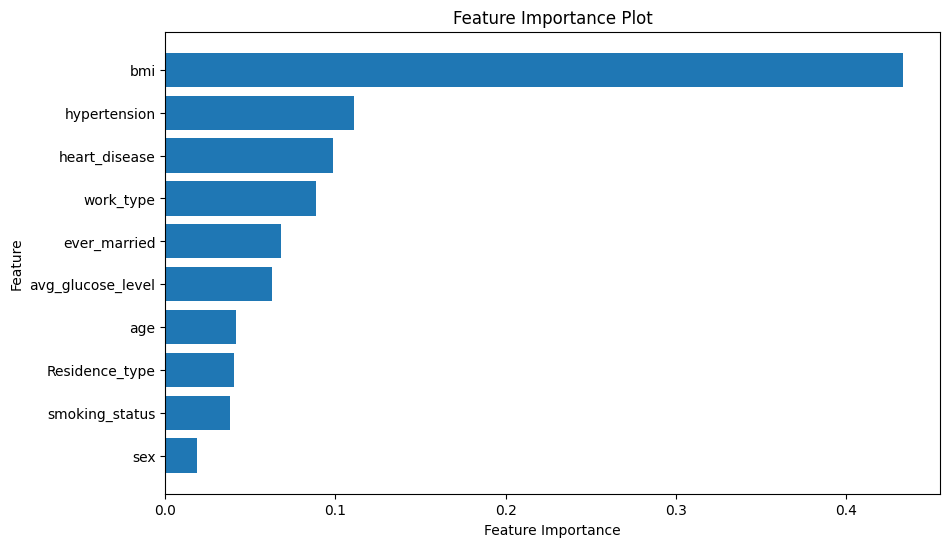

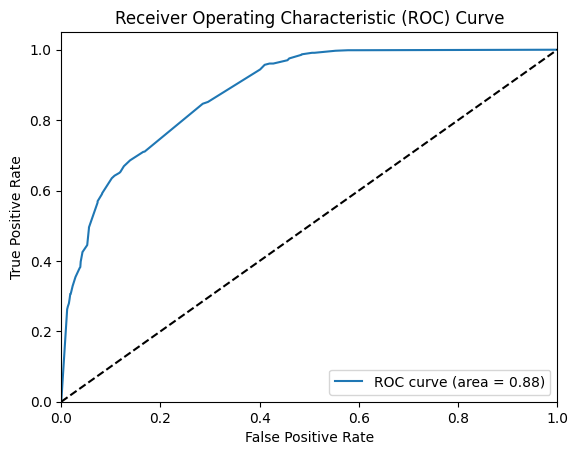

AUC Score: 0.8793003676936733


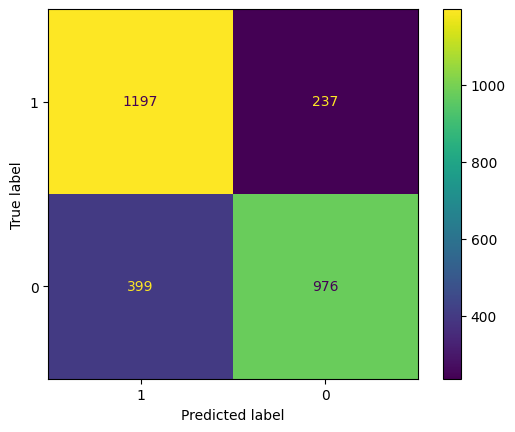

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7686832740213523, 0.8042704626334519, 0.8256227758007118, 0.8469750889679716, 0.8861209964412812, 0.7829181494661922, 0.8185053380782918, 0.8540925266903915, 0.8220640569395018, 0.8107142857142857]
Mean accuracy: 0.8219966954753433
95% confidence interval: (0.7974438687458161, 0.8465495222048705)


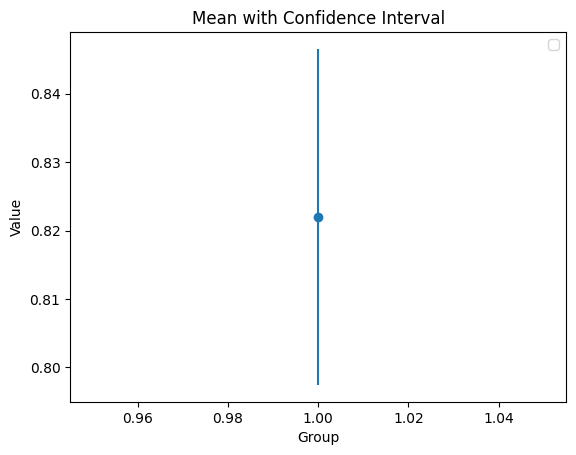

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, classification_report_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1434
           1       0.79      0.80      0.79      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809



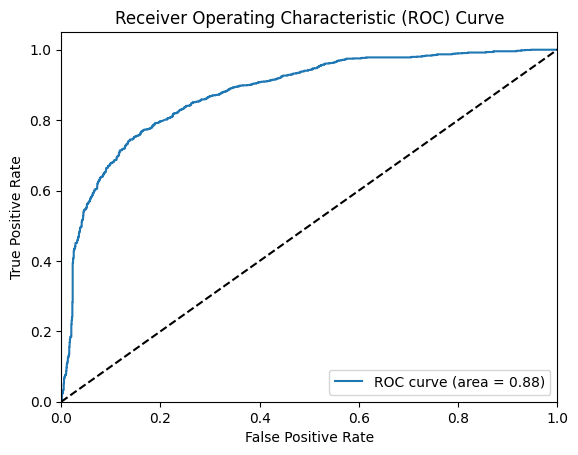

AUC Score: 0.8776627361480918


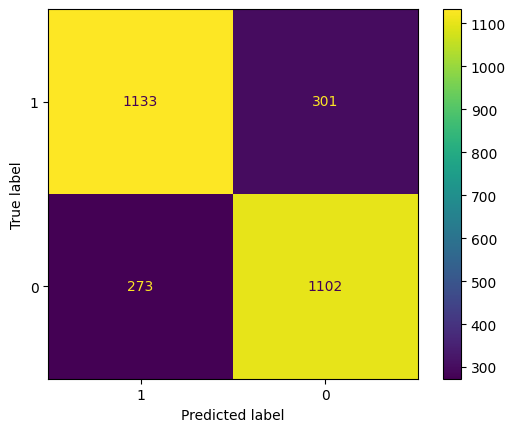

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7758007117437722, 0.800711743772242, 0.7686832740213523, 0.7437722419928826, 0.7544483985765125, 0.7864768683274022, 0.708185053380783, 0.7580071174377224, 0.7722419928825622, 0.8071428571428572]
Mean accuracy: 0.7675470259278089
95% confidence interval: (0.7469389074031371, 0.7881551444524807)


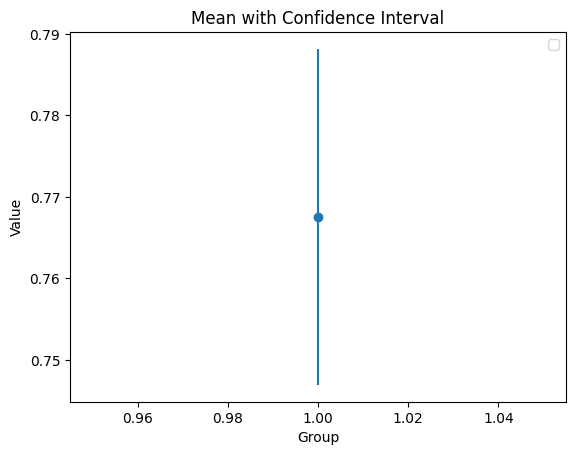

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, classification_report_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## bmi

In [22]:
df = df_clean.copy()

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

--------------------------------------
no outliers detected


In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


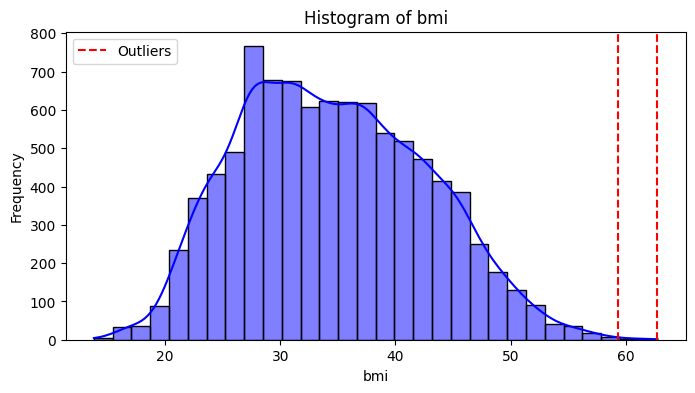

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1434
           1       0.82      0.77      0.80      1375

    accuracy                           0.81      2809
   macro avg       0.81      0.81      0.81      2809
weighted avg       0.81      0.81      0.81      2809

Node Labels:
 Annotation(0.624708, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6554\nvalue = [3286, 3268]\nclass = 0')


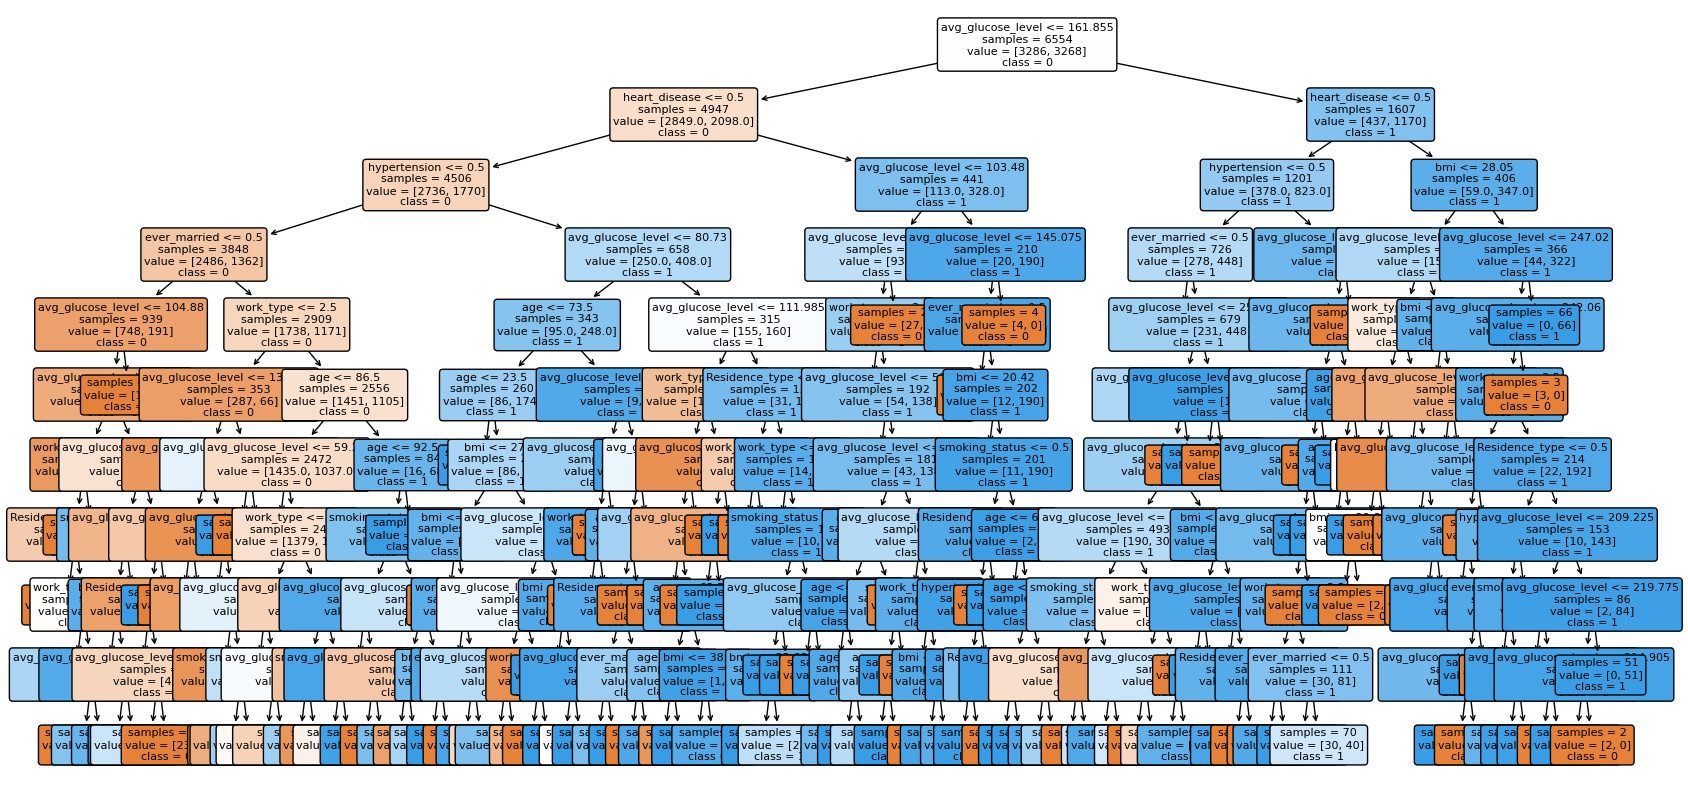

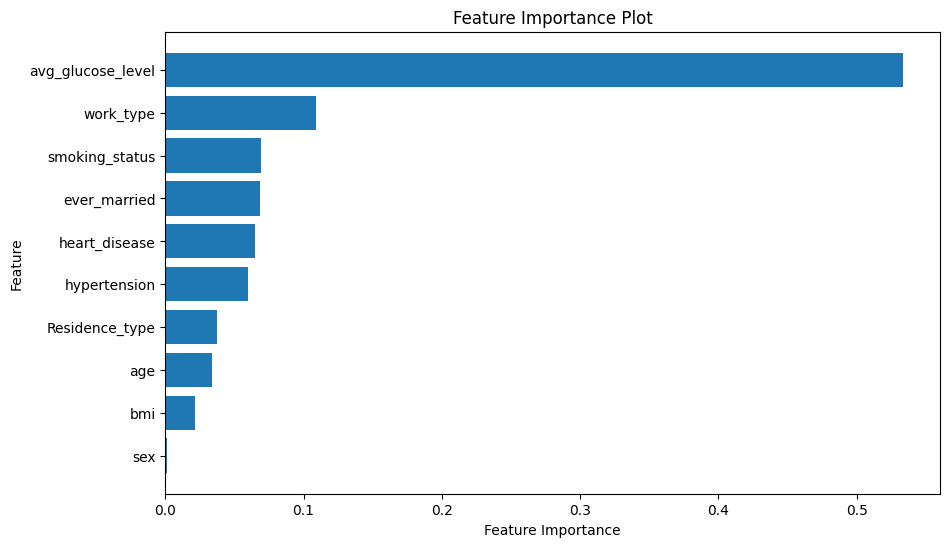

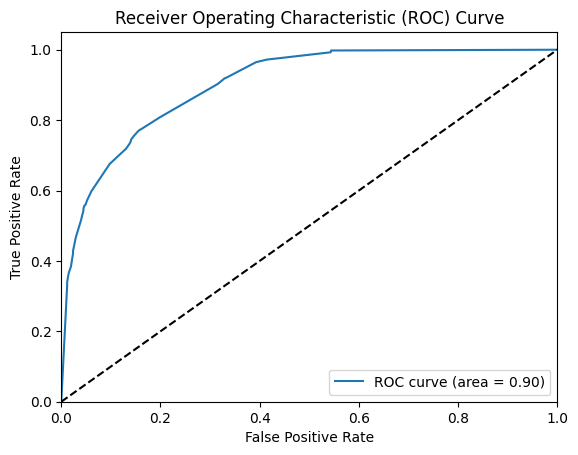

AUC Score: 0.901033092430582


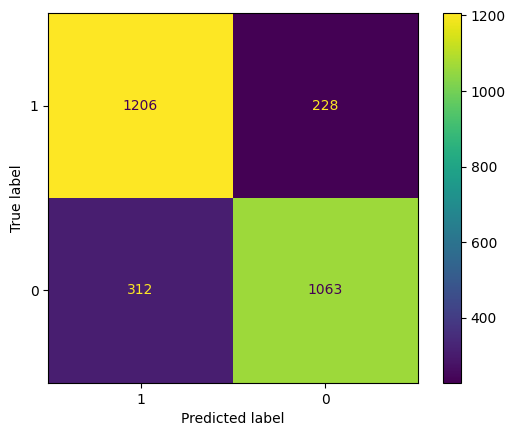

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7544483985765125, 0.8291814946619217, 0.8042704626334519, 0.7864768683274022, 0.8291814946619217, 0.8327402135231317, 0.8113879003558719, 0.8185053380782918, 0.7793594306049823, 0.8678571428571429]
Mean accuracy: 0.811340874428063
95% confidence interval: (0.7883853305224695, 0.8342964183336565)


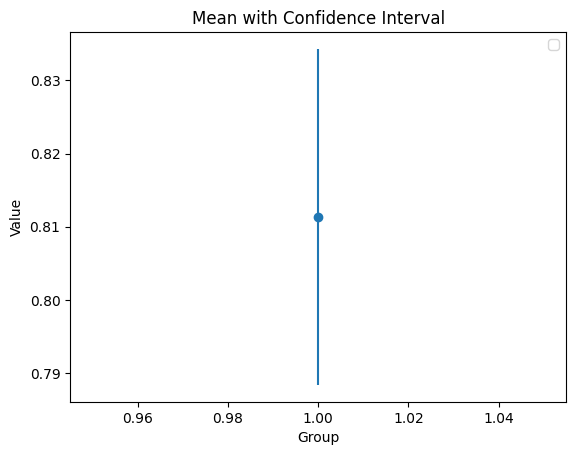

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, classification_report_dt_bmi, decision_tree = ML_algorithms.model_dt(df_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1434
           1       0.76      0.77      0.77      1375

    accuracy                           0.77      2809
   macro avg       0.77      0.77      0.77      2809
weighted avg       0.77      0.77      0.77      2809



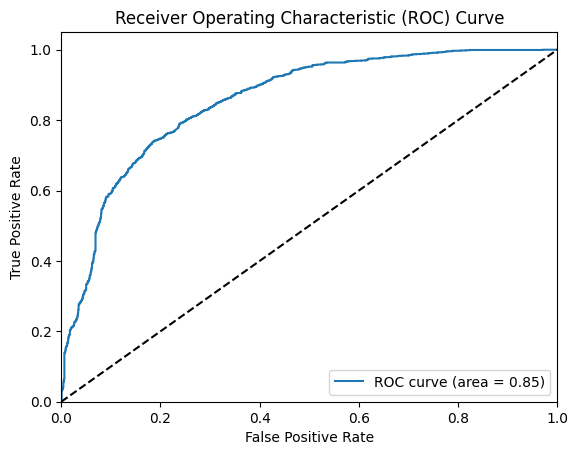

AUC Score: 0.8547178901990617


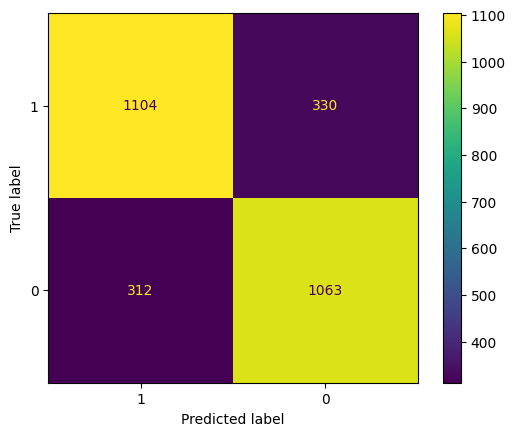

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8042704626334519, 0.7793594306049823, 0.7793594306049823, 0.7615658362989324, 0.7686832740213523, 0.7615658362989324, 0.7935943060498221, 0.7224199288256228, 0.7615658362989324, 0.7464285714285714]
Mean accuracy: 0.7678812913065581
95% confidence interval: (0.7511963098003968, 0.7845662728127195)


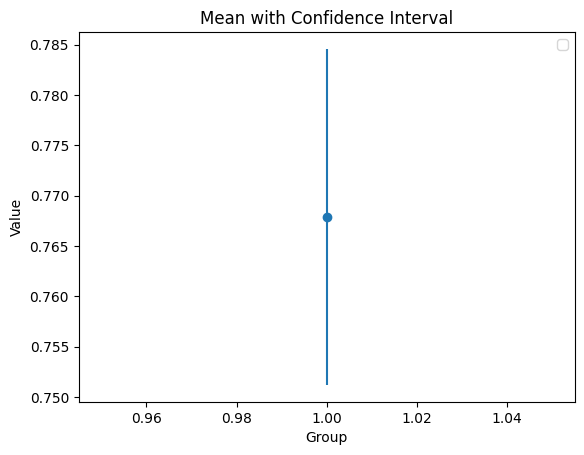

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, classification_report_svm_bmi, svm = ML_algorithms.model_svm(df_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_bmi, 'bmi')

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1434
           1       0.82      0.77      0.80      1375

    accuracy                           0.81      2809
   macro avg       0.81      0.81      0.81      2809
weighted avg       0.81      0.81      0.81      2809

Node Labels:
 Annotation(0.624708, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6554\nvalue = [3286, 3268]\nclass = 0')


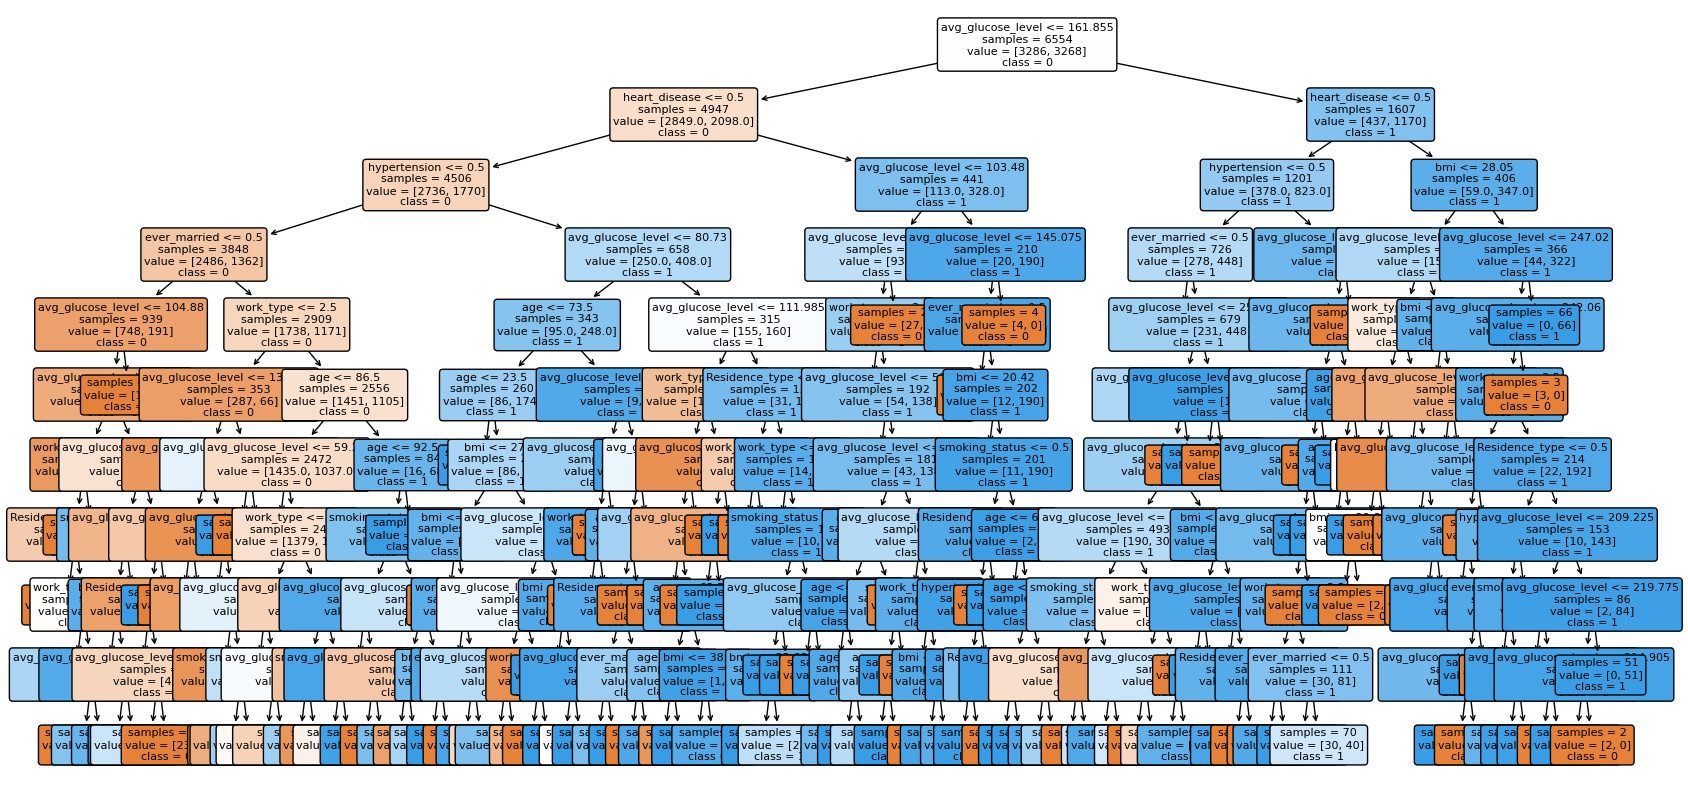

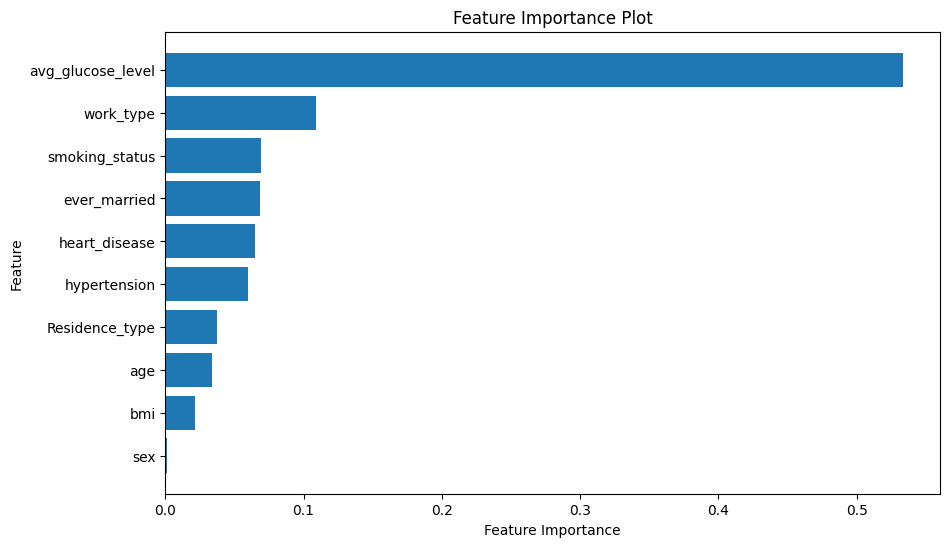

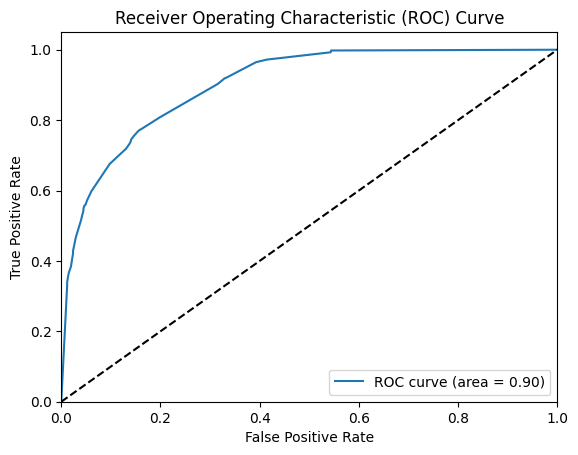

AUC Score: 0.901033092430582


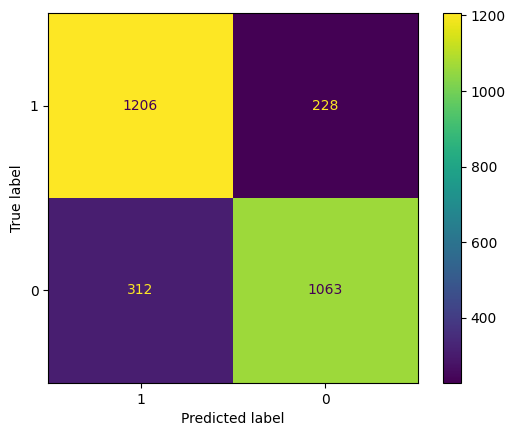

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8185053380782918, 0.7615658362989324, 0.8469750889679716, 0.7935943060498221, 0.8718861209964412, 0.7615658362989324, 0.8185053380782918, 0.8469750889679716, 0.8469750889679716, 0.8214285714285714]
Mean accuracy: 0.8187976614133197
95% confidence interval: (0.7922516413373304, 0.8453436814893089)


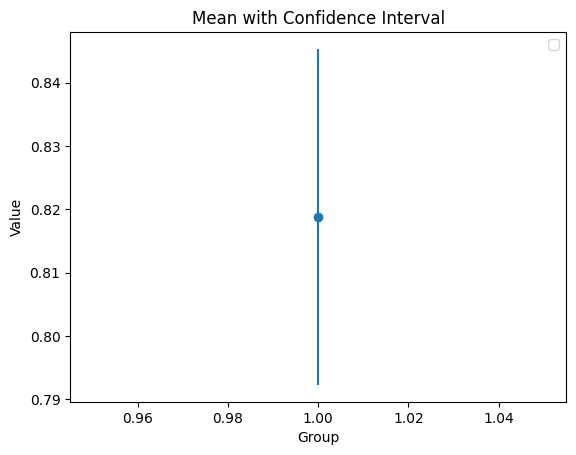

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, classification_report_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1434
           1       0.76      0.77      0.77      1375

    accuracy                           0.77      2809
   macro avg       0.77      0.77      0.77      2809
weighted avg       0.77      0.77      0.77      2809



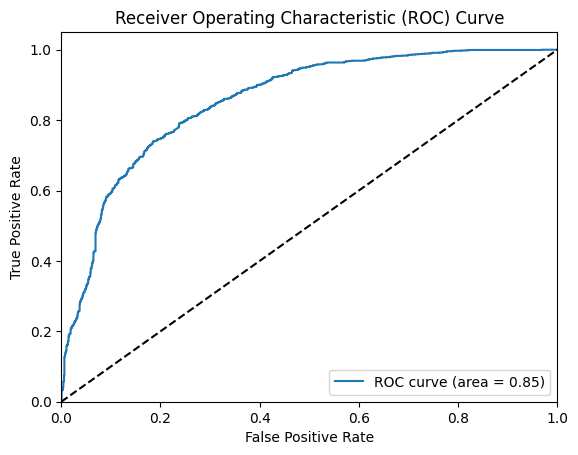

AUC Score: 0.8546872067959935


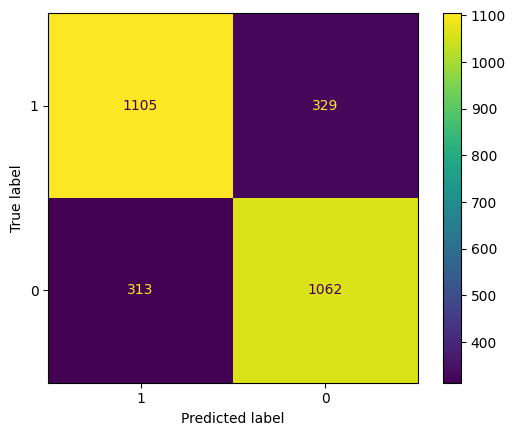

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7900355871886121, 0.7686832740213523, 0.7295373665480427, 0.7615658362989324, 0.7437722419928826, 0.7437722419928826, 0.7829181494661922, 0.8042704626334519, 0.7580071174377224, 0.775]
Mean accuracy: 0.7657562277580071
95% confidence interval: (0.749205876633115, 0.7823065788828992)


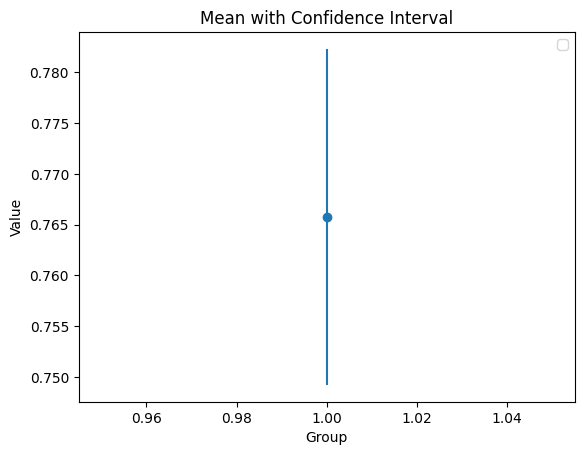

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, classification_report_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

# Categorical

In [32]:
df = df_clean.copy()

--------------------------------------
Value counts:
work_type
4    5833
3    2123
2    1265
1     122
0      20
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


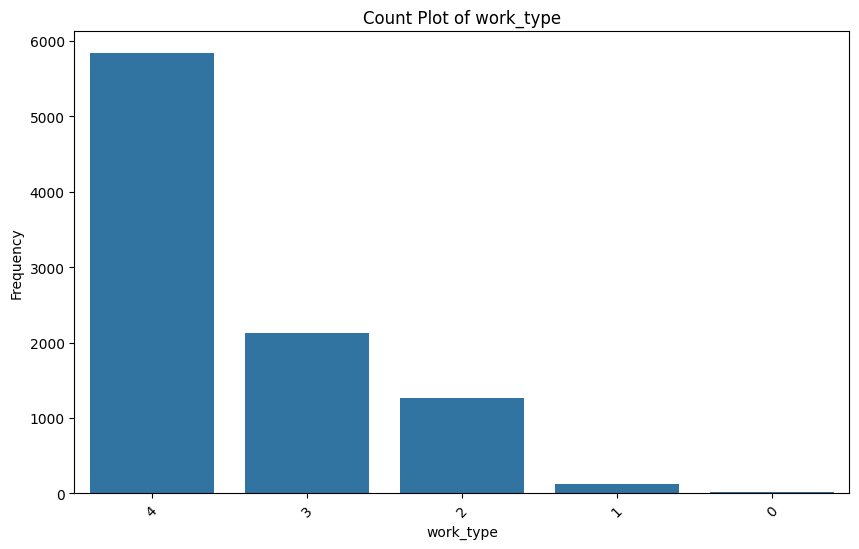

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 50, df)

Least frequent value:  0


Value counts:
work_type
0    4688
4    2880
3    1069
2     666
1      60
Name: count, dtype: int64
Outliers detected: [0, 4, 3, 2, 1]
Outliers found:


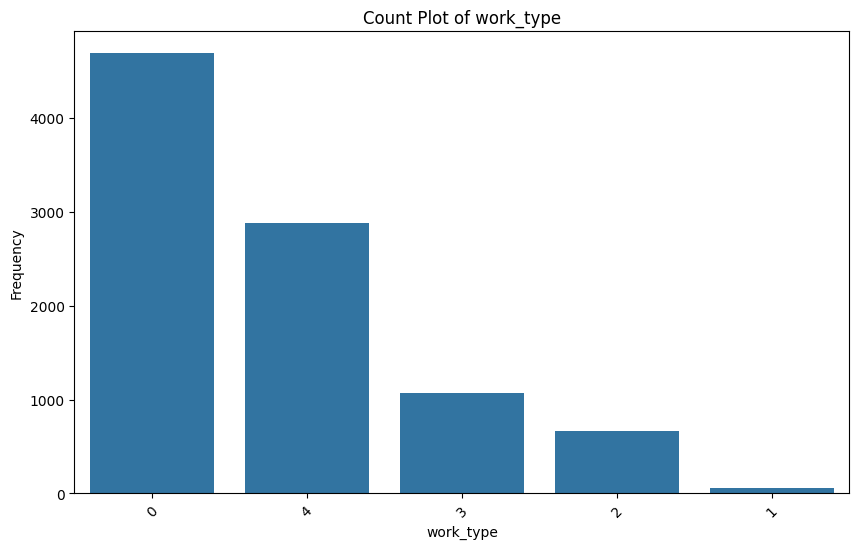

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1434
           1       0.78      0.86      0.82      1375

    accuracy                           0.81      2809
   macro avg       0.82      0.82      0.81      2809
weighted avg       0.82      0.81      0.81      2809

Node Labels:
 Annotation(0.638127, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


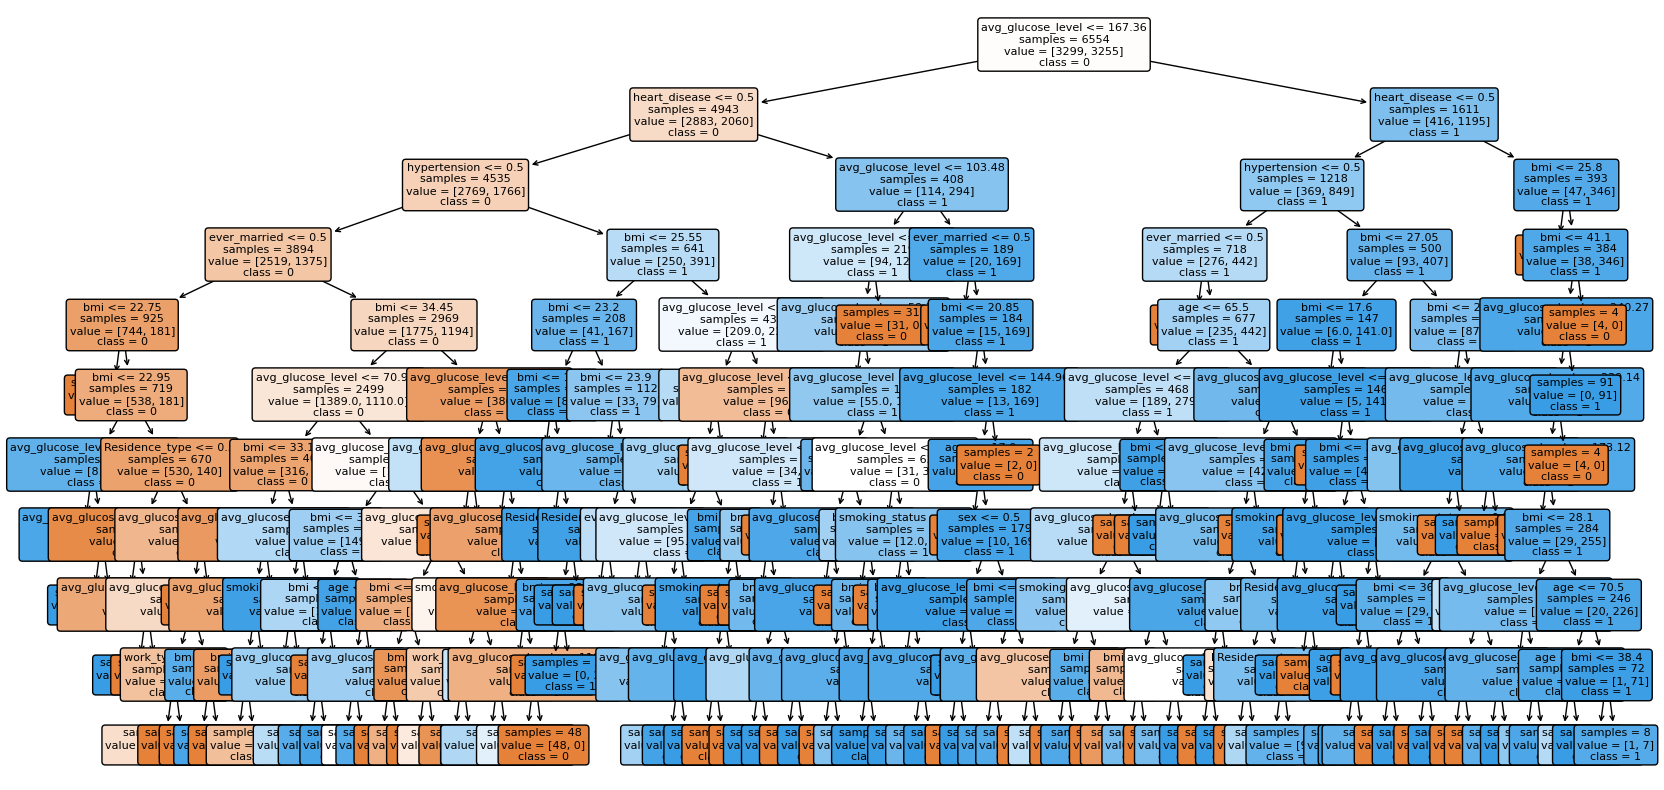

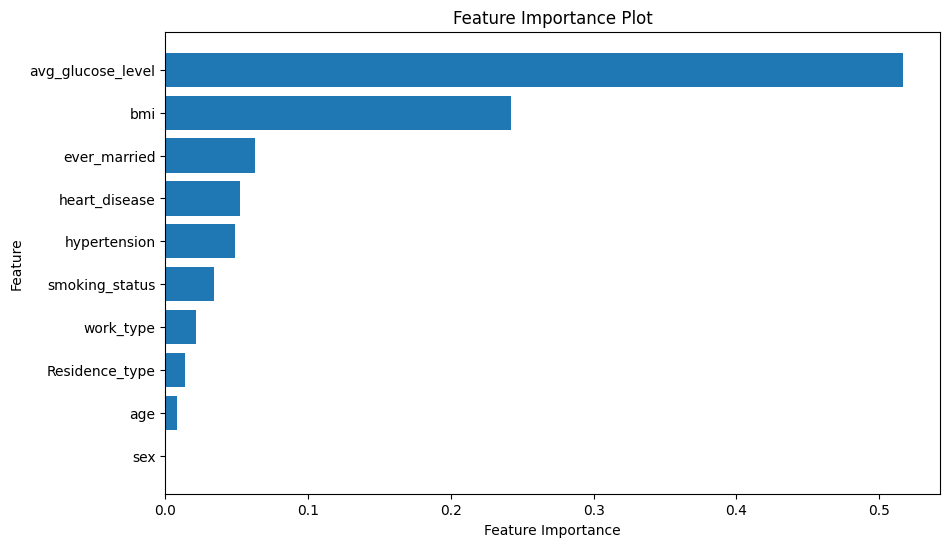

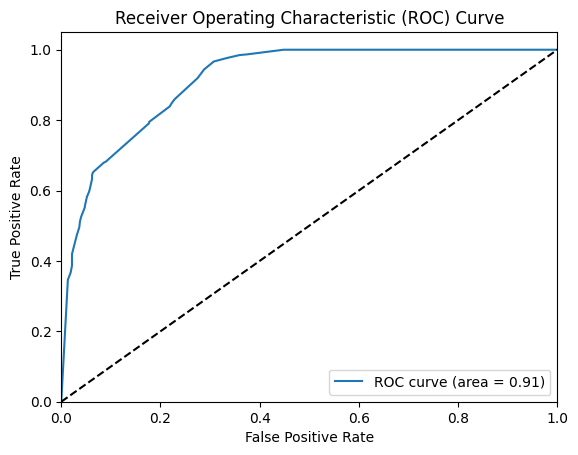

AUC Score: 0.914418917205528


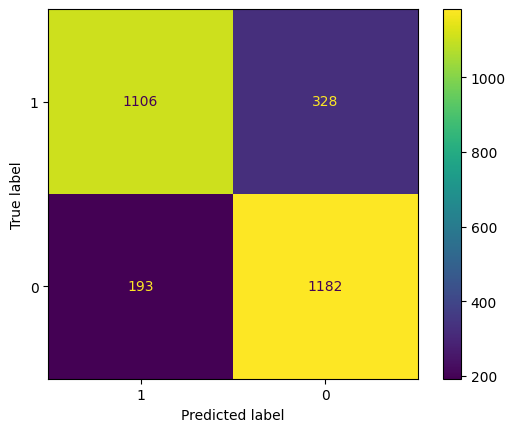

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8754448398576512, 0.8078291814946619, 0.7829181494661922, 0.8149466192170819, 0.8327402135231317, 0.8113879003558719, 0.8647686832740213, 0.8434163701067615, 0.7686832740213523, 0.8535714285714285]
Mean accuracy: 0.8255706659888155
95% confidence interval: (0.8007189180714385, 0.8504224139061924)


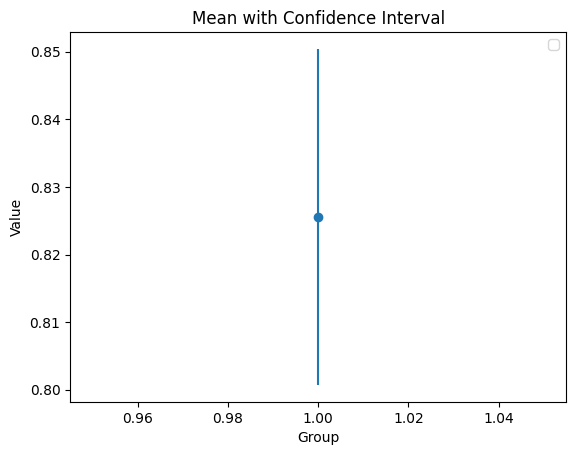

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, classification_report_dt_categorical, decision_tree = ML_algorithms.model_dt(df_categorical, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1434
           1       0.76      0.82      0.79      1375

    accuracy                           0.79      2809
   macro avg       0.79      0.79      0.79      2809
weighted avg       0.79      0.79      0.79      2809



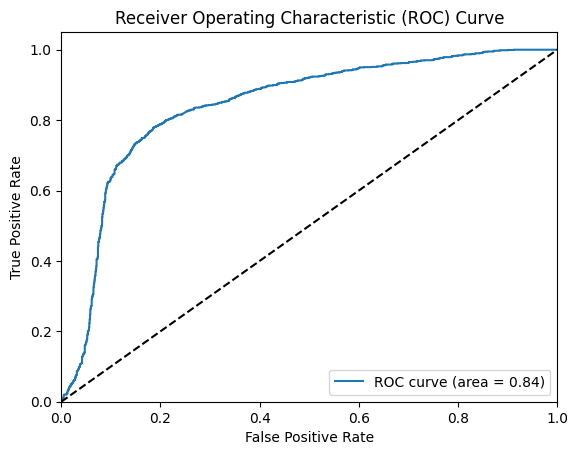

AUC Score: 0.8416239381260302


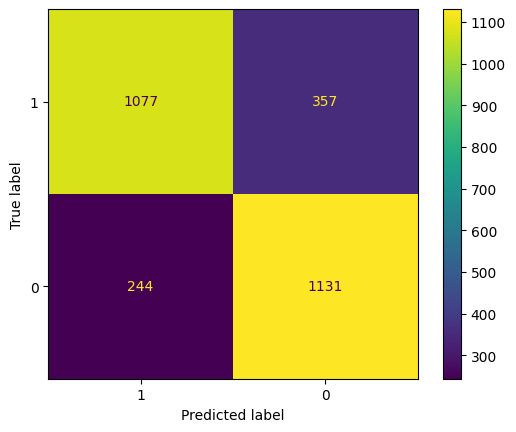

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7651245551601423, 0.7686832740213523, 0.800711743772242, 0.7722419928825622, 0.7686832740213523, 0.7366548042704626, 0.7544483985765125, 0.7580071174377224, 0.7722419928825622, 0.7535714285714286]
Mean accuracy: 0.765036858159634
95% confidence interval: (0.7531102959592794, 0.7769634203599886)


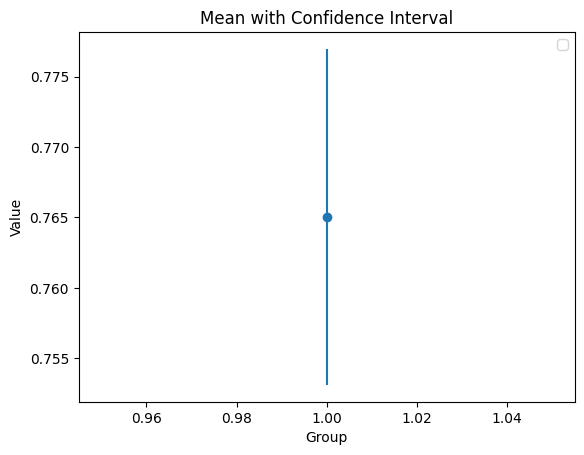

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, classification_report_svm_categorical, svm = ML_algorithms.model_svm(df_categorical, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm,df_clean)

print('--------------------------------------')

## Conclusion

### ROC Curve 

**Decision Tree**

Decision Tree


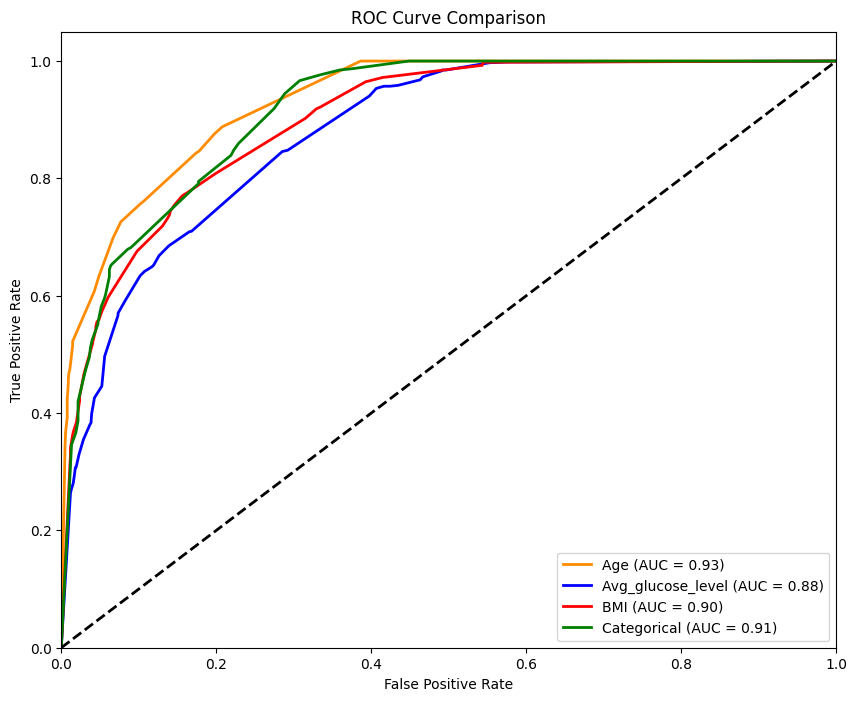

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

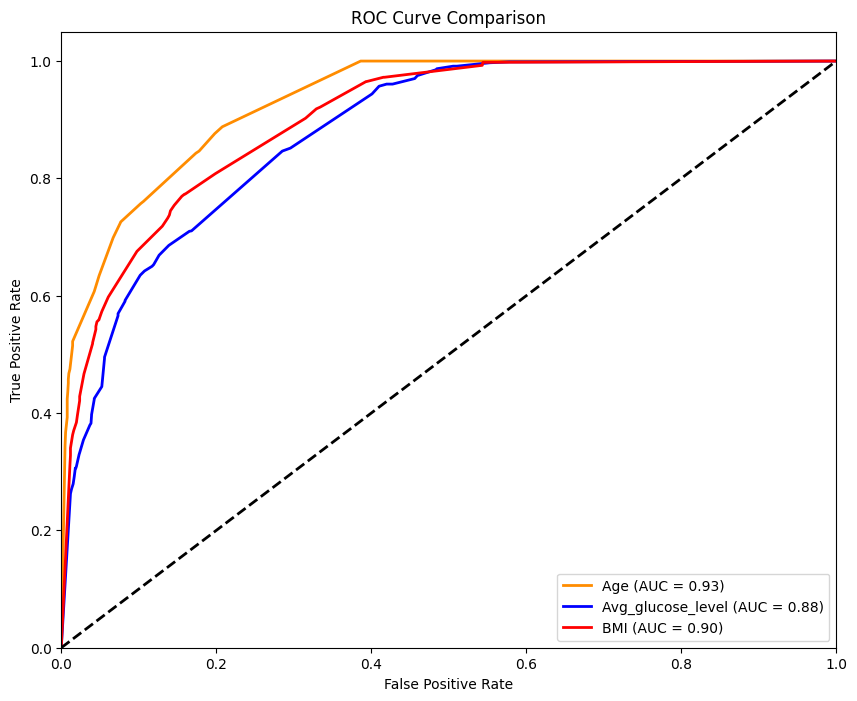

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

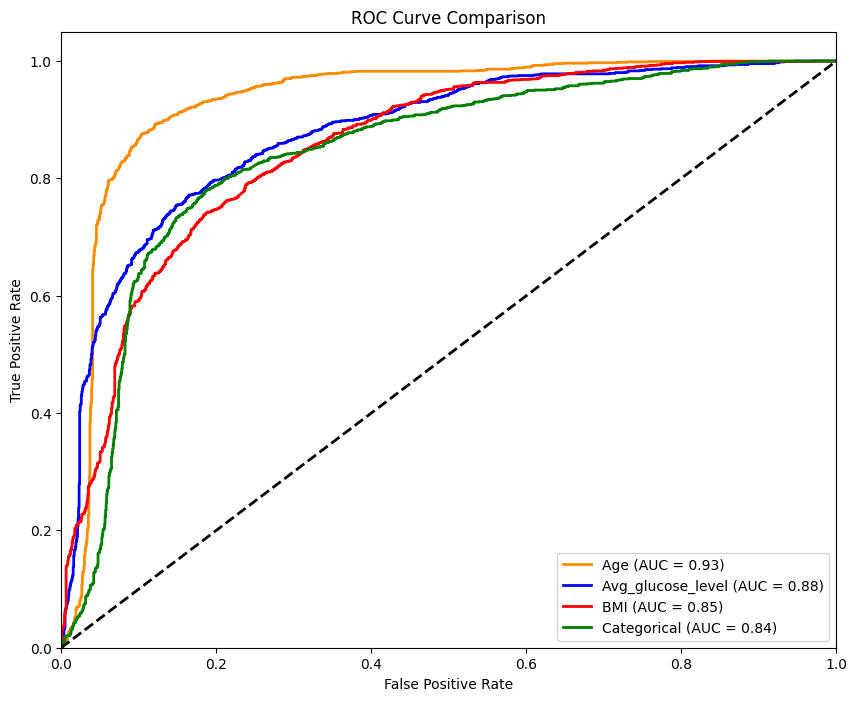

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

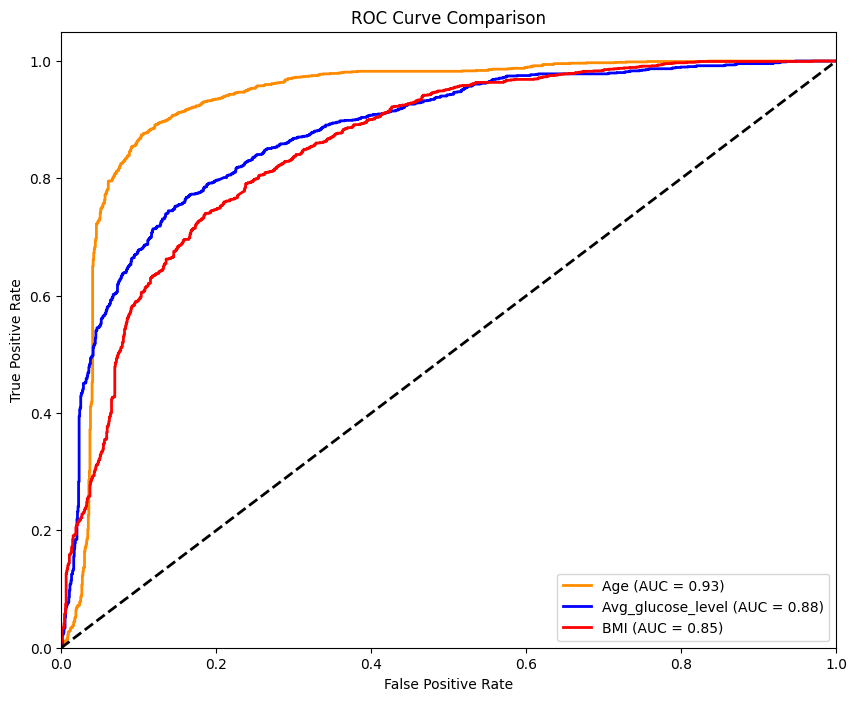

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Classification report

**Decision Tree**

In [42]:
print('Classification report - Decision Tree - Age')
print(classification_report_dt_age)
print('Classification report - Decision Tree - Avg_glucose_level')
print(classification_report_dt_glucose)
print('Classification report - Decision Tree - BMI')
print(classification_report_dt_bmi)
print('Classification report - Decision Tree - Categorical')
print(classification_report_dt_categorical)

Classification report - Decision Tree - Age
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1434
           1       0.81      0.88      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Classification report - Decision Tree - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1434
           1       0.80      0.71      0.75      1375

    accuracy                           0.77      2809
   macro avg       0.78      0.77      0.77      2809
weighted avg       0.78      0.77      0.77      2809

Classification report - Decision Tree - BMI
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1434
           1       0.82      0.77      0.80      1375

    accuracy                        

**Decision Tree - substitution of outliers**

In [43]:
print('Classification report - Decision Tree - Age')
print(classification_report_dt_20_age)
print('Classification report - Decision Tree - Avg_glucose_level')
print(classification_report_dt_20_glucose)
print('Classification report - Decision Tree - BMI')
print(classification_report_dt_20_bmi)

Classification report - Decision Tree - Age
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1434
           1       0.81      0.88      0.84      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Classification report - Decision Tree - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1434
           1       0.80      0.71      0.75      1375

    accuracy                           0.77      2809
   macro avg       0.78      0.77      0.77      2809
weighted avg       0.78      0.77      0.77      2809

Classification report - Decision Tree - BMI
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1434
           1       0.82      0.77      0.80      1375

    accuracy                        

**Support Vector Machine**

In [44]:
print('Classification report - SVM - Age')
print(classification_report_svm_age)
print('Classification report - SVM - Avg_glucose_level')
print(classification_report_svm_glucose)
print('Classification report - SVM - BMI')
print(classification_report_svm_bmi)
print('Classification report - SVM - Categorical')
print(classification_report_svm_categorical)

Classification report - SVM - Age
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1434
           1       0.85      0.91      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809

Classification report - SVM - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1434
           1       0.79      0.80      0.79      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809

Classification report - SVM - BMI
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1434
           1       0.76      0.77      0.77      1375

    accuracy                           0.77      2809
   macro avg

**Support Vector Machine - substitution of outliers**

In [45]:
print('Classification report - SVM - Age')
print(classification_report_svm_20_age)
print('Classification report - SVM - Avg_glucose_level')
print(classification_report_svm_20_glucose)
print('Classification report - SVM - BMI')
print(classification_report_svm_20_bmi)

Classification report - SVM - Age
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1434
           1       0.85      0.91      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.88      0.88      0.88      2809

Classification report - SVM - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1434
           1       0.79      0.80      0.79      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809

Classification report - SVM - BMI
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1434
           1       0.76      0.77      0.77      1375

    accuracy                           0.77      2809
   macro avg